# __Laboratorio. Análisis Exploratorio de Datos__

El objetivo de este laboratorio es poner en práctica los conceptos y métodos relacionados con el análisis exploratorio. Recuerde que el proceso debe centrarse alrededor de un conjunto de preguntas y que gran parte del éxito de esta etapa depende de seleccionar las visualizaciones y las preguntas adecuadas.


## __1. RMS Titanic__

Uno de los mayores desastres de la historia moderna ocurrió en 1912 con el hundimiento del trasatlántico  británico RMS Titanic. En este evento fallecieron aproximadamente 1500 personas.

<center>

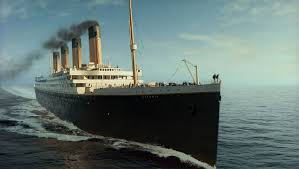

</center>

En este caso contamos con un conjunto de datos con información sobre el último viaje del trasatlántico. La información  con la que disponemos es la siguiente:

* `survived` Sobrevió ($0$ = NO, $1$ = SI)
* `pclass:` Tipo de tiquete (1ra-clase, 2da-clase, 3ra-clase)
* `sex:` Sexo
* `age:` Edad
* `sibsp:` Número de hermanos/cónyuges en el barco
* `parch:` Número de padres/hijos en el barco
* `fare:` Costo del viaje para el pasajero (en libras)
* `embarked:` Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
* `class:`Tipo de tiquete (1ra-clase, 2da-clase, 3ra-clase)
* `who:` hombre, mujer o niño.
A continuación se presentan los datos disponibles para el análisis.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset ('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


__1.__ Identifique las variables **numéricas, ordinales y nominales**. Realice un análisis descriptivo para cada una. **En cada caso debe presentar un valor numérico y una gráfica.**

### Identificación de la variables:

Variables Numéricas:

- Age

- Fare

- Sibsp

- Parch


Variables Categóricas Ordinales:

- PClass

- Class

- Variables Categóricas Nominales:

- Adult_male.

- Sex

- Embark_town.

- Alive        

- Survived

- Alone

- Who

- Embarked

- Deck

### Análisis descriptivo:

In [ ]:
num_vars = ['age', 'fare', 'sibsp', 'parch']

# Variables Categóricas Ordinales
ord_vars = ['pclass', 'class']

# Variables Categóricas Nominales
nom_vars = ['adult_male', 'sex', 'embark_town', 'alive', 'survived', 'alone', 'who', 'deck', 'embarked']

# Estadísticas descriptivas para variables numéricas
num_desc = data[num_vars].describe()

In [ ]:
num_desc

,age,fare,sibsp,parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


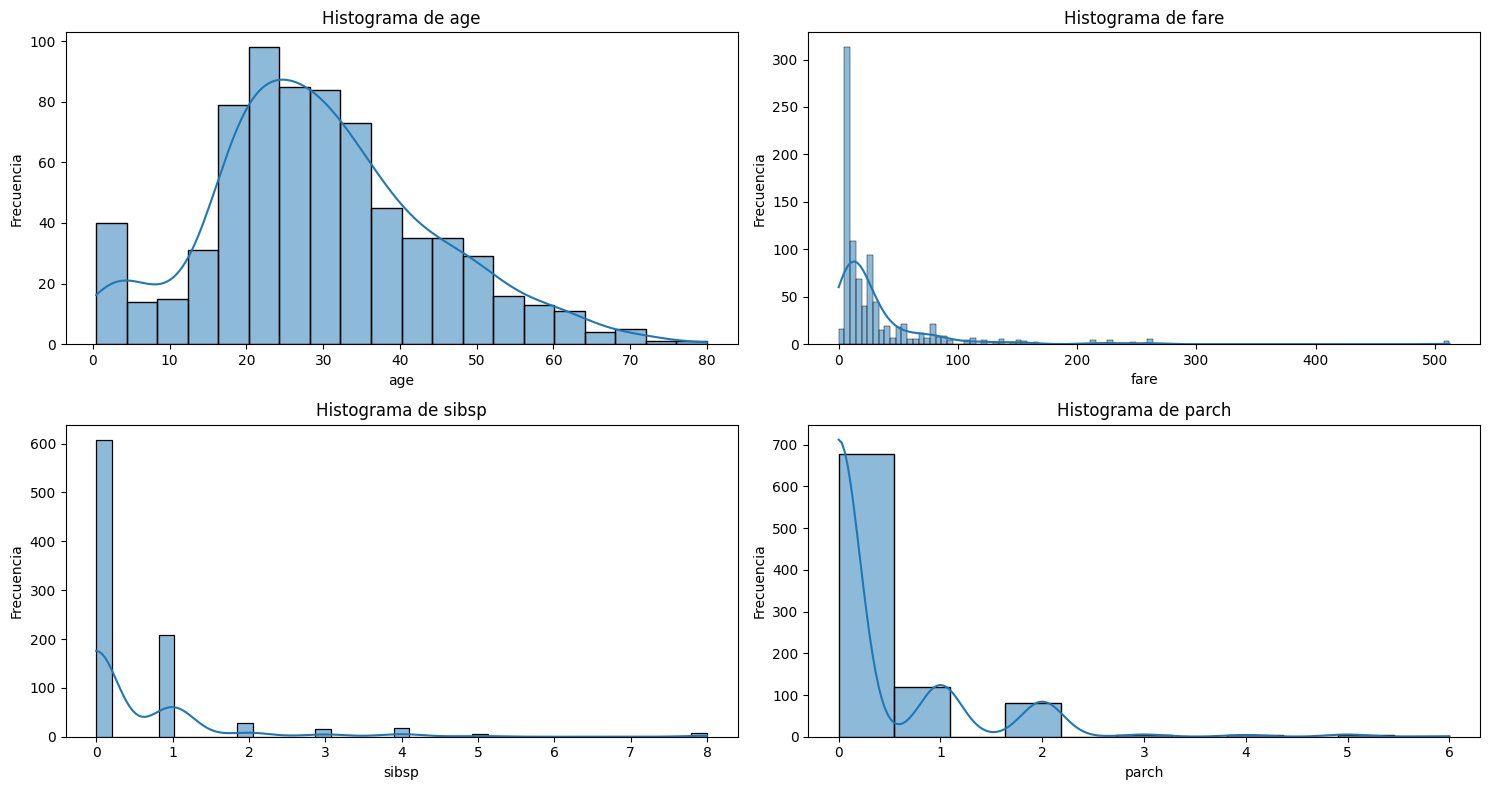

In [ ]:
# Histogramas para variables numéricas
plt.figure(figsize=(15, 8))
for i, var in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=var, kde=True)
    plt.title(f'Histograma de {var}')
    plt.ylabel('Frecuencia')  # Cambio en el eje y
plt.tight_layout()
plt.show()

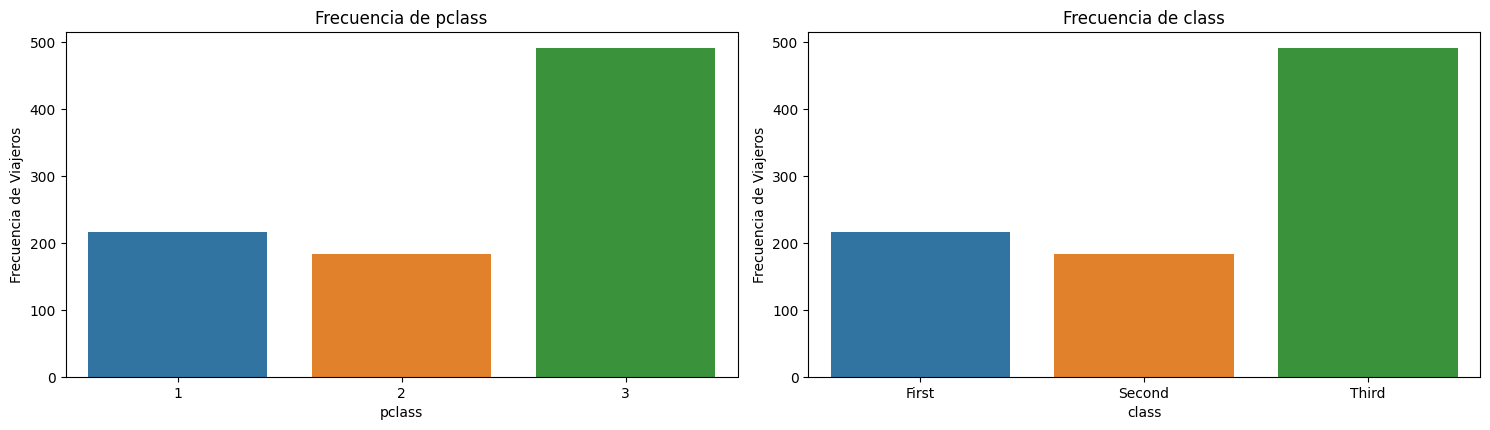

In [ ]:
# Gráfico de barras para variables categóricas ordinales
plt.figure(figsize=(15, 8))
for i, var in enumerate(ord_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=var)
    plt.title(f'Frecuencia de {var}')
    plt.ylabel('Frecuencia de Viajeros')  
plt.tight_layout()
plt.show()

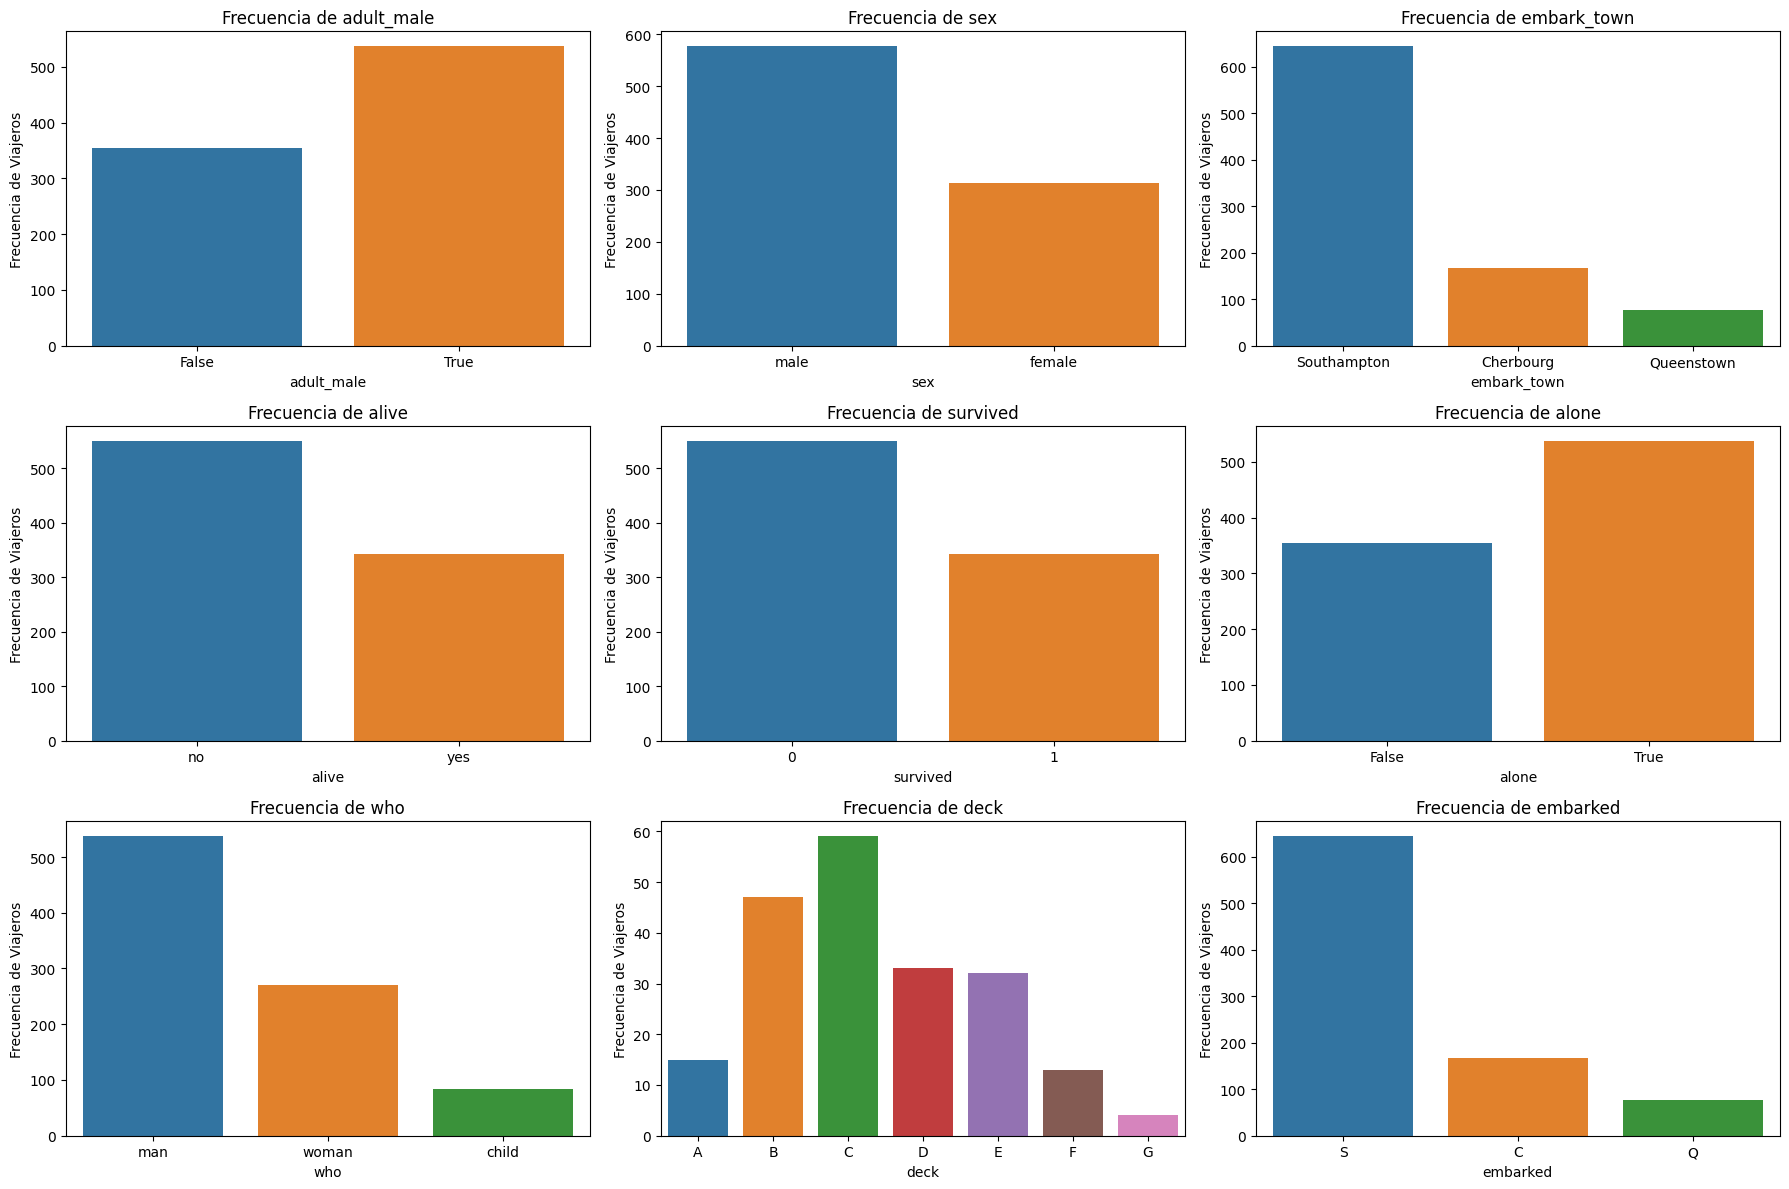

In [ ]:
# Gráfico de barras para variables categóricas nominales
plt.figure(figsize=(18, 12))
for i, var in enumerate(nom_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=var)
    plt.title(f'Frecuencia de {var}')
    plt.ylabel('Frecuencia de Viajeros')  
plt.tight_layout()
plt.show()

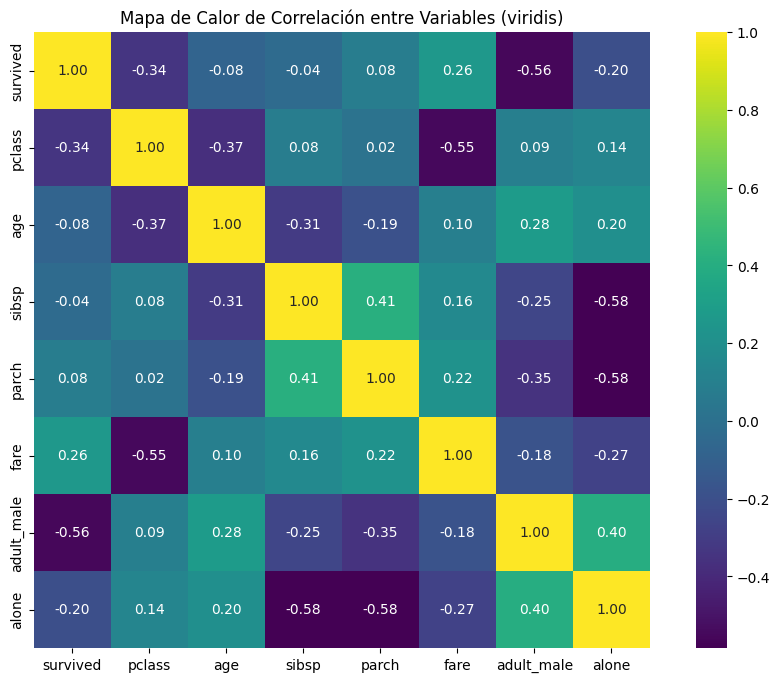

In [ ]:
# Calcular la matriz de correlación para todas las variables
correlation_matrix = data.corr()

# Calcular la matriz de correlación para todas las variables
correlation_matrix = data.corr()

# Crear un mapa de calor con el mapa de colores "viridis"
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", cbar=True, square=True)
plt.title("Mapa de Calor de Correlación entre Variables (viridis)")
plt.show()

Interpretemos los resultados del mapa de correlación entre las variables del conjunto de datos del Titanic utilizando el mapa de correlación:

Edad (Age):

- La edad está correlacionada negativamente con la clase de pasaje (Pclass), lo que significa que a medida que la edad aumenta, es más probable que el pasajero pertenezca a una clase de pasaje más baja.

- No muestra una correlación fuerte con otras variables numéricas.


Tarifa del Boleto (Fare):

- La tarifa del boleto muestra una correlación negativa moderada con la clase de pasaje (Pclass), lo que indica que las tarifas son más altas en clases de pasaje más bajas.

- La tarifa del boleto también tiene una correlación negativa moderada con el número de hermanos/cónyuges a bordo (SibSp) y el número de padres/hijos a bordo (Parch), lo que sugiere que las tarifas pueden ser más bajas cuando se viaja en grupo.


Número de Hermanos/Cónyuges a Bordo (SibSp):

- El número de hermanos/cónyuges a bordo muestra una correlación positiva con el número de padres/hijos a bordo (Parch), lo que indica que las familias tienden a viajar juntas.


Número de Padres/Hijos a Bordo (Parch):

- Al igual que SibSp, el número de padres/hijos a bordo muestra una correlación positiva con el número de hermanos/cónyuges a bordo (SibSp), lo que confirma que las familias tienden a viajar juntas.


Clase de Pasaje (Pclass):

- La clase de pasaje muestra correlaciones negativas con la edad y la tarifa del boleto, lo que indica que las clases de pasaje más altas tienden a estar asociadas con pasajeros más jóvenes y tarifas más altas.


Genero del Pasajero (Sex):

- El genero del pasajero muestra una correlación negativa con la clase de pasaje (Pclass), lo que sugiere que las clases de pasaje más altas pueden tener una mayor proporción de mujeres.

Sobrevivencia (Survived):

- La variable de sobrevivencia no muestra correlaciones fuertes con las otras variables numéricas, lo que sugiere que la sobrevivencia no está fuertemente influenciada por la edad, la tarifa, el número de hermanos/cónyuges ni el número de padres/hijos.

- Sin embargo, la sobrevivencia muestra una correlación negativa con la clase de pasaje (Pclass), lo que indica que los pasajeros en clases más altas tienen una mayor probabilidad de sobrevivir.


Adulto Hombre (Adult_male):

- No muestra correlaciones fuertes con otras variables en el conjunto de datos.


Ciudad de Embarque (Embark_town):

- No muestra correlaciones fuertes con otras variables en el conjunto de datos.


Solo o Acompañado (Alone):

- No muestra correlaciones fuertes con otras variables en el conjunto de datos.


Quién es el Pasajero (Who):

- No muestra correlaciones fuertes con otras variables en el conjunto de datos.

__2.__ Utilizando **análisis exploratorio** de datos responda las siguientes preguntas:

* ¿Cuál es la proporción de pasajeros que sobrevivió según la clase del tiquete?
* ¿Cuál es el promedio de las edades de los menores de edad que sobrevivieron en comparación con los fallecidos?
* Cuál fue la proporción de mujeres sobrevivientes según la clase del tiquete
* ¿Cuál es el promedio de las edades de los adultos que sobrevivieron en comparación con los fallecidos?
* ¿Cuál es la proporción de sobrevivientes con respecto al sexo?
* ¿Cuál es la proporción de sobrevivientes con respecto a la clase del tiquete?
* ¿Cuál es la proporción de sobrevivientes según el puerto de embarque?
* ¿Existe alguna diferencia entre la proporción de personas que viajaban solas y sobrevivieron en comparación con la proporción de personas que viajaban con acompañantes y sobrevivieron?
* ¿Cuál era la edad promedio de las personas según la clase del tiquete?
* ¿Los menores de edad de primera clase sobrevivieron en mayor proporción que los de tercera clase?
* Existe diferencia entre la proporción de mujeres sobrevivientes de tercera clase que sobrevivieron  y embarcaron en Cherbourg

Recuerde que cada pregunta:
* debe ser respondida explícitamente presetando un valor numérico y una gráfica.
* debe tener una interpretación a los resultados.


In [ ]:
# 1)¿Cuál es la proporción de pasajeros que sobrevivió según la clase del tiquete?
proporcion_sobrevivientes_porclase = pd.crosstab(index = data['survived'], columns = data['pclass'], margins=True)
proporcion_sobrevivientes_porclase

pclass,1,2,3,All
survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


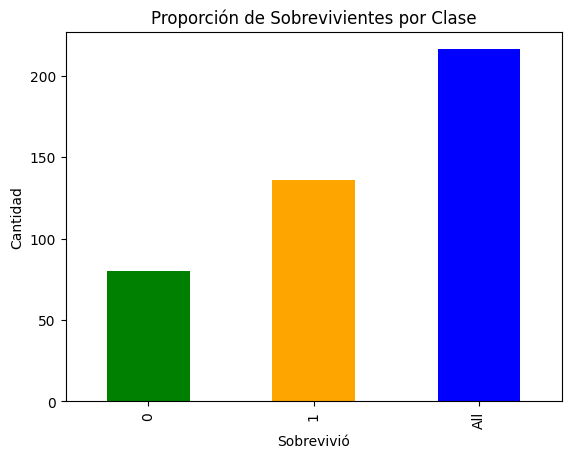

In [ ]:
proporcion_sobrevivientes_porclase = proporcion_sobrevivientes_porclase[1]

# Definir los colores para cada clase
colores = ['green', 'orange', 'blue']

# Crear el gráfico de barras apiladas
proporcion_sobrevivientes_porclase.plot(kind='bar', stacked=True, color=colores)

# Configurar el título y las etiquetas de los ejes
plt.title('Proporción de Sobrevivientes por Clase')
plt.xlabel('Sobrevivió')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

En el conjunto de datos con un total de 891 pasajeros, se observa que 549 de ellos no sobrevivieron, mientras que 342 lograron sobrevivir. Estos datos se desglosan en tres clases de boletos, donde la primera clase (clase 1) tuvo 80 no sobrevivientes y 136 sobrevivientes, la segunda clase (clase 2) contó con 97 no sobrevivientes y 87 sobrevivientes, y la tercera clase (clase 3) registró la mayor cantidad de no sobrevivientes, con 372, y 119 sobrevivientes. Estos números proporcionan una visión general de la relación entre la clase de boleto y la supervivencia de los pasajeros en el conjunto de datos del Titanic.

In [ ]:
# 2) ¿Cuál es el promedio de las edades de los menores de edad que sobrevivieron en comparación con los fallecidos?
mean_age_survived = data.loc[(data['age'] < 18) & (data['survived'] == 1), 'age'].mean()
mean_age_survived

7.888032786885246

In [ ]:
mean_age_not_survived = data.loc[(data['age'] < 18) & (data['survived'] == 0), 'age'].mean()
mean_age_not_survived

10.39423076923077

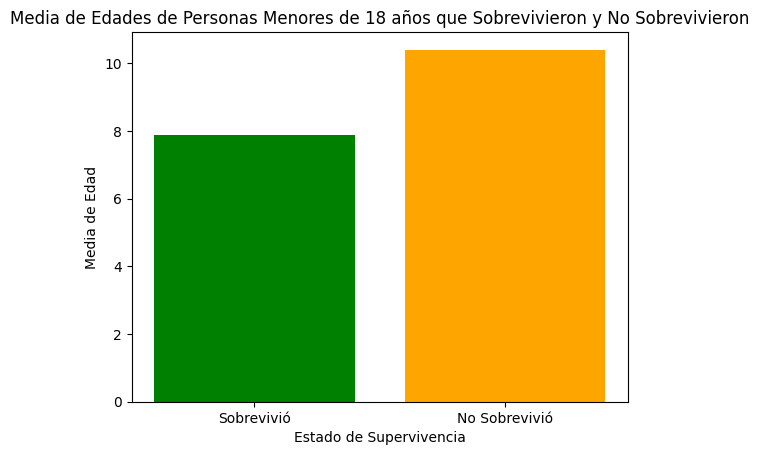

In [ ]:
mean_ages = [mean_age_survived, mean_age_not_survived]
labels = ['Sobrevivió', 'No Sobrevivió']
colors = ['green', 'orange'] 

plt.bar(labels, mean_ages, color=colors)
plt.title('Media de Edades de Personas Menores de 18 años que Sobrevivieron y No Sobrevivieron')
plt.xlabel('Estado de Supervivencia')
plt.ylabel('Media de Edad')
plt.show()

El promedio de las edades de menores de edad que sobrevivieron fue de 8 años, mientras que el promedio de las personas que no sobrevivieron fue de 18 años.

In [ ]:
# 3) Cuál fue la proporción de mujeres sobrevivientes según la clase del tiquete
proporcion_mujeres_sobrevivientes = data[(data['sex'] == 'female') & (data['survived'] == 1)].groupby('pclass').size() / data[data['sex'] == 'female'].groupby('pclass').size()

proporcion_mujeres_sobrevivientes

pclass
1    0.968085
2    0.921053
3    0.500000
dtype: float64

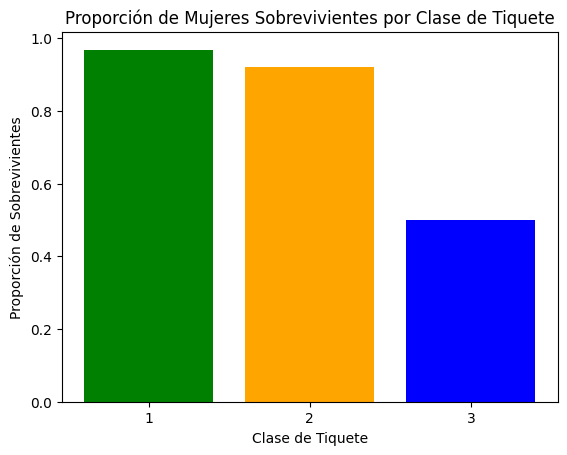

In [ ]:
colores = ['green', 'orange', 'blue']

plt.bar(proporcion_mujeres_sobrevivientes.index, proporcion_mujeres_sobrevivientes.values, color=colores)
plt.title('Proporción de Mujeres Sobrevivientes por Clase de Tiquete')
plt.xlabel('Clase de Tiquete')
plt.ylabel('Proporción de Sobrevivientes')
plt.xticks(proporcion_mujeres_sobrevivientes.index)  # Mostrar todas las clases en el eje x
plt.show()

En general, la proporción de mujeres de la primera clase que sobrevivieron fue de 0.97, de la segunda lase 0.92 y de la tercera clase 0.59.

In [ ]:
# 4) ¿Cuál es el promedio de las edades de los adultos que sobrevivieron en comparación con los fallecidos?
promedio_edad_sobrevivientes = data[data['survived'] == 1]['age'].mean()
promedio_edad_fallecidos = data[data['survived'] == 0]['age'].mean()
print("El promedio de edades las personas que sobrevivieron fue de: ",promedio_edad_sobrevivientes)
print("El promedio de edades las personas que no sobrevivieron fue de: ",promedio_edad_fallecidos)

El promedio de edades las personas que sobrevivieron fue de:  28.343689655172415
El promedio de edades las personas que no sobrevivieron fue de:  30.62617924528302


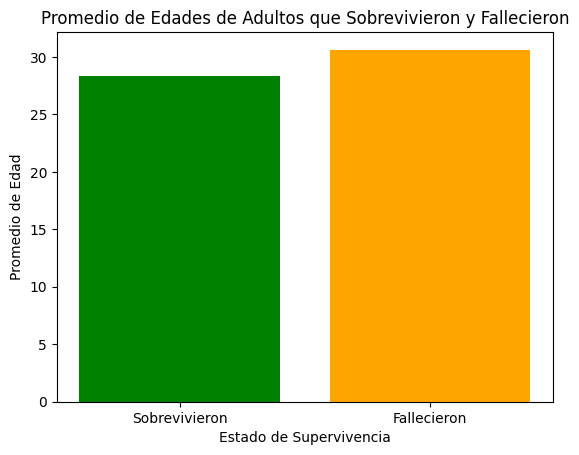

In [ ]:
promedios_edades = [promedio_edad_sobrevivientes, promedio_edad_fallecidos]

labels = ['Sobrevivieron', 'Fallecieron']
colores = ['green', 'orange']

plt.bar(labels, promedios_edades, color=colores)

plt.title('Promedio de Edades de Adultos que Sobrevivieron y Fallecieron')
plt.xlabel('Estado de Supervivencia')
plt.ylabel('Promedio de Edad')

plt.show()

 En general, los adultos que sobrevivieron tenían un promedio de edad ligeramente menor en comparación con los que no sobrevivieron. Sin embargo, la diferencia en los promedios es relativamente pequeña, lo que sugiere que la edad por sí sola no fue el factor principal en la supervivencia en el Titanic. 

In [ ]:
# 5) ¿Cuál es la proporción de sobrevivientes con respecto al sexo?
tabla_sexo_sobrevivientes = pd.crosstab(data['sex'], data['survived'], normalize='index')
tabla_sexo_sobrevivientes

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


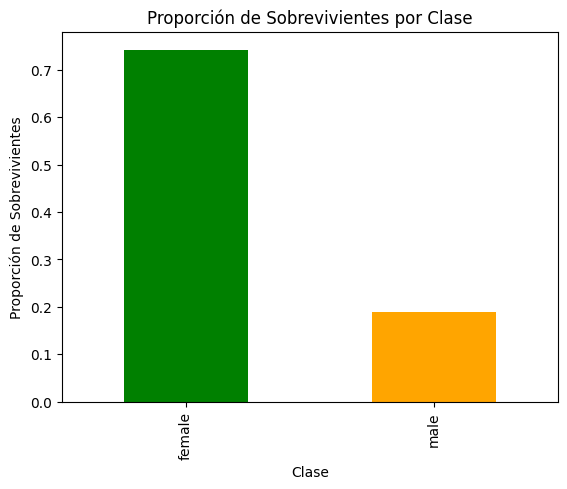

In [ ]:
proporciones_sobrevivientes = tabla_sexo_sobrevivientes[1]

colores = ['green', 'orange', 'blue']

proporciones_sobrevivientes.plot(kind='bar', color=colores)

# Personalizar el gráfico
plt.xlabel('Clase')
plt.ylabel('Proporción de Sobrevivientes')
plt.title('Proporción de Sobrevivientes por Clase')

# Mostrar el gráfico
plt.show()

Estos números muestran claramente una diferencia significativa en las tasas de supervivencia entre hombres y mujeres en el Titanic. Las mujeres tuvieron una proporción mucho mayor de supervivencia del (0.74) en comparación con los hombres (0.18). Esto es consistente con la política de "mujeres y niños primero" que se siguió durante el naufragio del Titanic, lo que resultó en tasas de supervivencia más altas para las mujeres.

In [ ]:
# 6) ¿Cuál es la proporción de sobrevivientes con respecto a la clase del tiquete?
tabla_clase_sobrevivientes = pd.crosstab(data['pclass'], data['survived'], normalize='index')
tabla_clase_sobrevivientes

survived,0,1
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Los resultados indican que la clase del boleto desempeñó un papel importante en las tasas de supervivencia en el Titanic. Los pasajeros de primera clase tuvieron la mayor proporción de supervivencia, seguidos por los de segunda clase, mientras que los de tercera clase tuvieron la menor proporción de supervivencia. Esto sugiere una correlación significativa entre la clase del boleto y las tasas de supervivencia, con los pasajeros de clases superiores teniendo mayores probabilidades de sobrevivir.

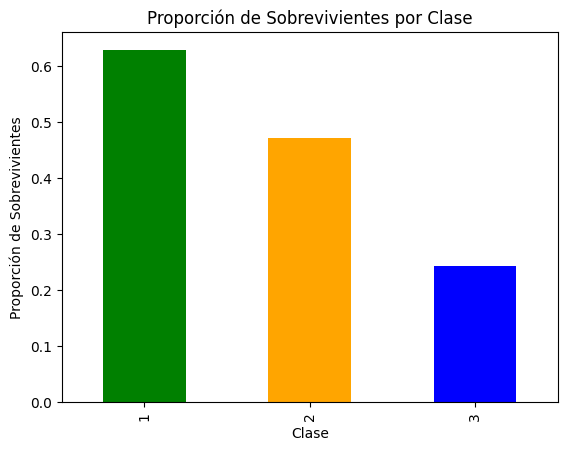

In [ ]:
proporciones_sobrevivientes = tabla_clase_sobrevivientes[1]

colores = ['green', 'orange', 'blue']

proporciones_sobrevivientes.plot(kind='bar', color=colores)

# Personalizar el gráfico
plt.xlabel('Clase')
plt.ylabel('Proporción de Sobrevivientes')
plt.title('Proporción de Sobrevivientes por Clase')

# Mostrar el gráfico
plt.show()

In [ ]:
# 7) ¿Cuál es la proporción de sobrevivientes según el puerto de embarque?
proporcion_sobrevivientes = data.groupby('embarked')['survived'].mean()

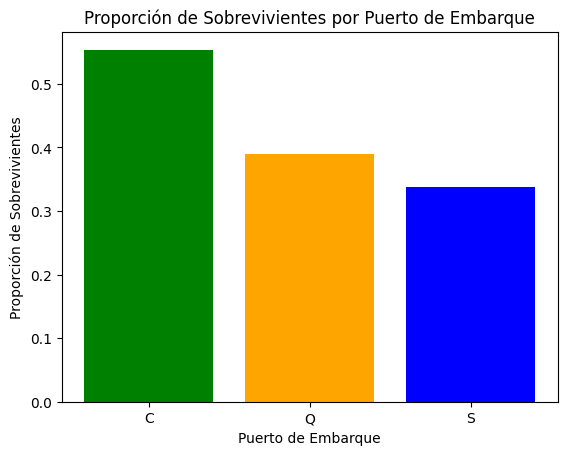

In [ ]:
colores = ['green', 'orange', 'blue']

plt.bar(proporcion_sobrevivientes.index, proporcion_sobrevivientes.values, color=colores)

plt.title('Proporción de Sobrevivientes por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Proporción de Sobrevivientes')

plt.show()

La proporción de sobrevivientes varió según el puerto de embarque. El puerto "C" tuvo la mayor proporción de sobrevivientes, seguido por el puerto "Q" y luego el puerto "S". Esta variación puede deberse a varios factores, como la distribución de clases de boletos, la ubicación de las cabinas en el barco o la disponibilidad de botes salvavidas en cada puerto.

In [ ]:
# 8) ¿Existe alguna diferencia entre la proporción de personas que viajaban solas y sobrevivieron en comparación con la proporción de personas  que viajaban con acompañantes y sobrevivieron?

solo_travelers = data[data['sibsp'] + data['parch'] == 0]
proporcion_sobrevivientes_solo = solo_travelers['survived'].mean() 

acompanantes_travelers = data[data['sibsp'] + data['parch'] > 0]
sobrevivientes_Conacompanantes = acompanantes_travelers['survived'].mean() 

print("Proporción de sobrevivientes entre personas que viajaban solas:", proporcion_sobrevivientes_solo)
print("Proporción de sobrevivientes entre personas que viajaban con acompañantes:", sobrevivientes_Conacompanantes)

Proporción de sobrevivientes entre personas que viajaban solas: 0.30353817504655495
Proporción de sobrevivientes entre personas que viajaban con acompañantes: 0.5056497175141242


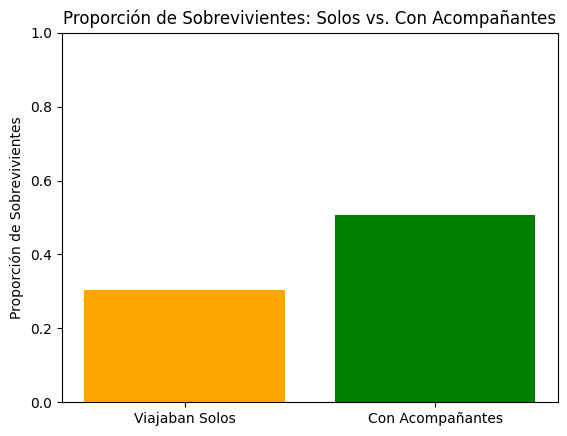

In [ ]:
plt.bar(['Viajaban Solos', 'Con Acompañantes'], [proporcion_sobrevivientes_solo, sobrevivientes_Conacompanantes], color=['orange', 'green'])
plt.title('Proporción de Sobrevivientes: Solos vs. Con Acompañantes')
plt.ylabel('Proporción de Sobrevivientes')
plt.ylim(0, 1)  

plt.show()

In [ ]:
diferencia_proporciones = sobrevivientes_Conacompanantes - proporcion_sobrevivientes_solo
print("Diferencia en proporciones:", diferencia_proporciones)

Diferencia en proporciones: 0.2021115424675693


Los resultados confirman que las personas que viajaban con acompañantes tenían una proporción más alta de supervivencia en comparación con las que viajaban solas, con una diferencia significativa del 0.2021. Esto sugiere que la presencia de acompañantes pudo haber influido en la capacidad de las personas para sobrevivir al desastre del Titanic.

In [ ]:
# 9) ¿Cuál era la edad promedio de las personas según la clase del tiquete?
edad_promedio_por_clase  = data.groupby('pclass')['age'].mean()
edad_promedio_por_clase

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

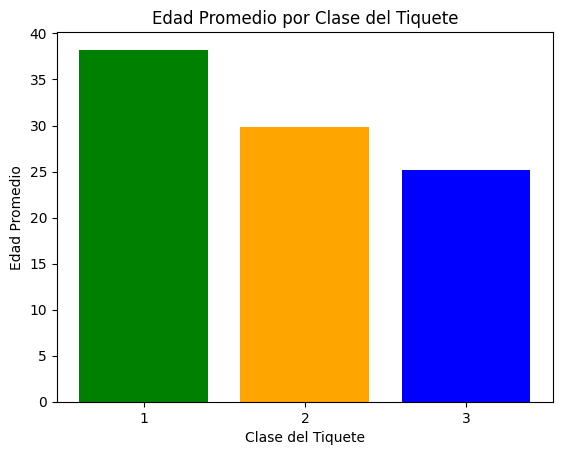

In [ ]:
colores = ['green', 'orange', 'blue']

plt.bar(edad_promedio_por_clase.index, edad_promedio_por_clase.values, color=colores)

plt.title('Edad Promedio por Clase del Tiquete')
plt.xlabel('Clase del Tiquete')
plt.ylabel('Edad Promedio')

plt.xticks([1, 2, 3])

plt.show()

En promedio, los pasajeros de primera clase tendían a ser más mayores que los de segunda clase, y los de segunda clase tendían a ser más mayores que los de tercera clase. Esto podría deberse a las diferencias en los perfiles de los pasajeros en cada clase, ya que las clases inferiores podrían haber estado ocupadas en su mayoría por adultos mayores o familias más acomodadas, mientras que la tercera clase podría haber tenido más jóvenes y familias con menos recursos.

In [ ]:
# 10) ¿Los menores de edad de primera clase sobrevivieron en mayor proporción que los de tercera clase?

menores_primera_clase = data[(data['pclass'] == 1) & (data['age'] < 18)]

menores_tercera_clase = data[(data['pclass'] == 3) & (data['age'] < 18)]

proporcion_sobrevivientes_primera_clase = menores_primera_clase['survived'].mean() 
proporcion_sobrevivientes_tercera_clase = menores_tercera_clase['survived'].mean() 

print("Proporción de sobrevivientes de menores de edad en primera clase:", proporcion_sobrevivientes_primera_clase)
print("Proporción de sobrevivientes de menores de edad en tercera clase:", proporcion_sobrevivientes_tercera_clase)

Proporción de sobrevivientes de menores de edad en primera clase: 0.9166666666666666
Proporción de sobrevivientes de menores de edad en tercera clase: 0.3717948717948718


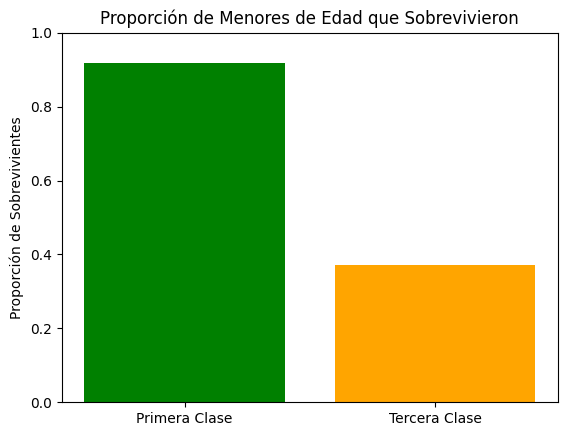

In [ ]:
# Visualización de las proporciones
plt.bar(['Primera Clase', 'Tercera Clase'], [proporcion_sobrevivientes_primera_clase, proporcion_sobrevivientes_tercera_clase], color=['green', 'orange'])
plt.title('Proporción de Menores de Edad que Sobrevivieron')
plt.ylabel('Proporción de Sobrevivientes')
plt.ylim(0, 1)  # Establecer el rango del eje y entre 0 y 1 para proporciones

# Mostrar la gráfica
plt.show()

Esto sugiere que la clase del boleto tenía un impacto significativo en la supervivencia de los menores de edad en el Titanic, ya que los menores de edad de primera clase tuvieron una proporción de supervivencia mucho más alta que los de tercera clase. Puede haber varias razones detrás de esta diferencia, como la prioridad en el acceso a botes salvavidas o las condiciones de las cabinas en las diferentes clases.

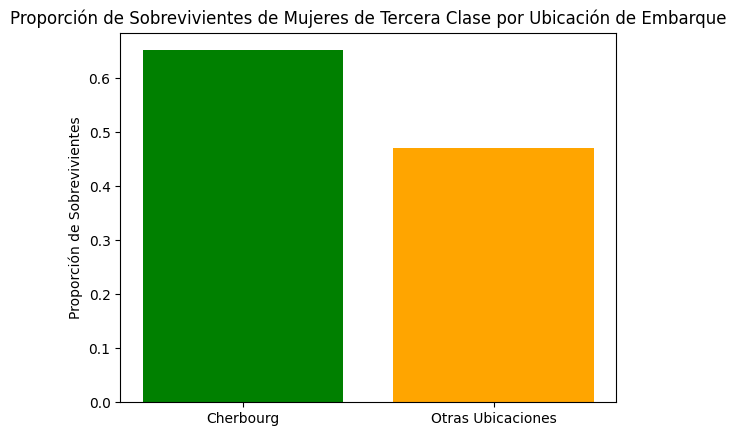

Proporción de sobrevivientes de mujeres de tercera clase que embarcaron en Cherbourg: 0.6521739130434783
Proporción de sobrevivientes de mujeres de tercera clase que embarcaron en otras ubicaciones: 0.47107438016528924


In [ ]:
# 11) Existe diferencia entre la proporción de mujeres sobrevivientes de tercera clase que sobrevivieron  y 
# embarcaron en Cherbourg ?

# Filtrar el dataset para obtener mujeres de tercera clase que embarcaron en Cherbourg
mujeres_tercera_cherbourg = data[(data['pclass'] == 3) & (data['sex'] == 'female') & 
(data['embarked'] == 'C')]

# Filtrar el dataset para obtener mujeres de tercera clase que embarcaron en otras ubicaciones
mujeres_tercera_otros = data[(data['pclass'] == 3) & (data['sex'] == 'female') & 
(data['embarked'] != 'C')]

# Calcular la proporción de sobrevivientes en cada grupo
proporcion_sobrevivientes_cherbourg = mujeres_tercera_cherbourg['survived'].mean() 
proporcion_sobrevivientes_otros = mujeres_tercera_otros['survived'].mean() 

# Crear una gráfica de barras para comparar las proporciones
plt.bar(['Cherbourg', 'Otras Ubicaciones'], [proporcion_sobrevivientes_cherbourg, proporcion_sobrevivientes_otros], color=['green', 'orange'])
plt.ylabel('Proporción de Sobrevivientes')
plt.title('Proporción de Sobrevivientes de Mujeres de Tercera Clase por Ubicación de Embarque')
plt.show()

# Mostrar los resultados
print("Proporción de sobrevivientes de mujeres de tercera clase que embarcaron en Cherbourg:", proporcion_sobrevivientes_cherbourg)
print("Proporción de sobrevivientes de mujeres de tercera clase que embarcaron en otras ubicaciones:", proporcion_sobrevivientes_otros)

Las mujeres de tercera clase que embarcaron en Cherbourg tuvieron una proporción de supervivencia significativamente más alta en comparación con aquellas que embarcaron en otras ubicaciones. Esto podría deberse a diferentes factores, como la distribución de las cabinas en el barco, la disponibilidad de botes salvavidas o incluso a la composición de pasajeros en esos puertos de embarque específicos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c953dfe-579f-4b17-a554-293900b7bc15' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>